In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Load the dataset
df = pd.read_csv('/kaggle/input/background/amazon_stock_data_with_details.csv')

In [2]:
def cprint(df):
    """
    Customize the style of the table cells.

    Args:
        df (DataFrame): The DataFrame to be styled.

    Returns:
        Styler: A pandas Styler object with custom styling applied.
    """
    # Define custom styles
    custom_styles = [
        {
            # Style table header cells within the thead section
            'selector': 'thead th',
            'props': [
                ('background-color', '#a163b4'), 
                ('color', 'white'),
                ('border', '1.5px solid transparent'),
                ('border-bottom', '1.5px solid #ffffff'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Style table index cells
            'selector': 'th.row_heading, td.row_heading',
            'props': [
                ('background-color', '#a163b4'), 
                ('color', 'white'),
                ('border', '1.5px solid transparent'),
                ('border-right', '1.5px solid #ffffff'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Apply gradient background colors to table cells
            'selector': 'td',
            'props': [
                ('background', 'linear-gradient(to right, #f5f5f1, #a163b4)'),
                ('color', 'black'),
                ('border', '1.5px solid transparent'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Apply alternating background colors to rows
            'selector': 'tr:nth-child(even)',
            'props': [
                ('background-color', '#f5f5f1'),
                ('color', 'black')
            ]
        },
        {
            # Apply alternating background colors to rows
            'selector': 'tr:nth-child(odd)',
            'props': [
                ('background-color', '#e6d0ff'),
                ('color', 'black')
            ]
        }
    ]

    # Apply custom styling
    styled_df = df.style.set_table_styles(custom_styles).set_caption("First 5 rows of Dataset")

    # Format float values in the DataFrame to have 2 decimal places
    float_cols = df.select_dtypes(include=['float']).columns
    styled_df = styled_df.format({col: '{:.2f}' for col in float_cols})

    # Customize individual columns
    column_styles = {
        'Open': 'color: #6a0dad',     # Purple color for Open column
        'High': 'color: #6a0dad',     # Purple color for High column
        'Low': 'color: #6a0dad',      # Purple color for Low column
        'Close': 'color: #6a0dad',    # Purple color for Close column
        'Volume': 'color: #6a0dad',   # Purple color for Volume column
        'Adj Close': 'color: #6a0dad',# Purple color for Adj Close column
        'SMA_50': 'color: #6a0dad',   # Purple color for SMA_50 column
        'SMA_200': 'color: #6a0dad',  # Purple color for SMA_200 column
        'RSI': 'color: #6a0dad',      # Purple color for RSI column
        'Upper Band': 'color: #6a0dad',  # Purple color for Upper Band column
        'Middle Band': 'color: #6a0dad', # Purple color for Middle Band column
        'Lower Band': 'color: #6a0dad'   # Purple color for Lower Band column
    }
    styled_df = styled_df.set_properties(**column_styles)

    # Increase font size
    styled_df = styled_df.set_properties(**{'font-size': '14px'})

    return styled_df

# Example usage
# Replace df with your DataFrame
styled_df = cprint(df.head())
styled_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Upper_Band,Lower_Band
0,2020-10-15,164.60,167.79,164.00,166.93,166.93,104468000,161.06,127.48,63.33,173.15,144.52
1,2020-10-16,168.16,169.98,158.00,163.64,163.64,129488000,161.11,127.82,55.48,173.10,146.16
2,2020-10-19,164.98,166.45,159.64,160.36,160.36,104472000,161.15,128.15,53.33,172.56,147.94
3,2020-10-20,161.11,163.30,159.60,160.85,160.85,90194000,161.22,128.48,53.62,172.65,148.29
4,2020-10-21,160.62,161.69,158.00,159.25,159.25,91854000,161.32,128.80,47.99,172.09,149.76


In [3]:
def cprint(df):
    """
    Customize the style of the table cells.

    Args:
        df (DataFrame): The DataFrame to be styled.

    Returns:
        Styler: A pandas Styler object with custom styling applied.
    """
    # Define custom styles
    custom_styles = [
        {
            # Style table header cells within the thead section
            'selector': 'thead th',
            'props': [
                ('background-color', '#a163b4'), 
                ('color', 'white'),
                ('border', '1.5px solid transparent'),
                ('border-bottom', '1.5px solid #ffffff'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Style table index cells
            'selector': 'th.row_heading, td.row_heading',
            'props': [
                ('background-color', '#a163b4'), 
                ('color', 'white'),
                ('border', '1.5px solid transparent'),
                ('border-right', '1.5px solid #ffffff'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Apply gradient background colors to table cells
            'selector': 'td',
            'props': [
                ('background', 'linear-gradient(to right, #f5f5f1, #a163b4)'),
                ('color', 'black'),
                ('border', '1.5px solid transparent'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Apply alternating background colors to rows
            'selector': 'tr:nth-child(even)',
            'props': [
                ('background-color', '#f5f5f1'),
                ('color', 'black')
            ]
        },
        {
            # Apply alternating background colors to rows
            'selector': 'tr:nth-child(odd)',
            'props': [
                ('background-color', '#e6d0ff'),
                ('color', 'black')
            ]
        }
    ]

    # Apply custom styling
    styled_df = df.style.set_table_styles(custom_styles).set_caption("Last  5 rows of Dataset")

    # Format float values in the DataFrame to have 2 decimal places
    float_cols = df.select_dtypes(include=['float']).columns
    styled_df = styled_df.format({col: '{:.2f}' for col in float_cols})

    # Customize individual columns
    column_styles = {
        'Open': 'color: #6a0dad',     # Purple color for Open column
        'High': 'color: #6a0dad',     # Purple color for High column
        'Low': 'color: #6a0dad',      # Purple color for Low column
        'Close': 'color: #6a0dad',    # Purple color for Close column
        'Volume': 'color: #6a0dad',   # Purple color for Volume column
        'Adj Close': 'color: #6a0dad',# Purple color for Adj Close column
        'SMA_50': 'color: #6a0dad',   # Purple color for SMA_50 column
        'SMA_200': 'color: #6a0dad',  # Purple color for SMA_200 column
        'RSI': 'color: #6a0dad',      # Purple color for RSI column
        'Upper Band': 'color: #6a0dad',  # Purple color for Upper Band column
        'Middle Band': 'color: #6a0dad', # Purple color for Middle Band column
        'Lower Band': 'color: #6a0dad'   # Purple color for Lower Band column
    }
    styled_df = styled_df.set_properties(**column_styles)

    # Increase font size
    styled_df = styled_df.set_properties(**{'font-size': '14px'})

    return styled_df




styled_df = cprint(df.tail())
styled_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Upper_Band,Lower_Band
843,2024-02-23,174.28,175.75,173.70,174.99,174.99,59715200,158.42,138.56,55.43,179.47,156.18
844,2024-02-26,175.70,176.37,174.26,174.73,174.73,44368600,158.96,138.90,57.88,179.88,157.33
845,2024-02-27,174.08,174.62,172.86,173.54,173.54,31141700,159.46,139.22,57.81,180.14,158.29
846,2024-02-28,172.44,174.05,172.27,173.16,173.16,28180500,159.97,139.53,54.85,179.85,160.00
847,2024-02-29,173.01,177.22,172.85,176.76,176.76,53805400,160.51,139.86,61.53,178.61,163.40


In [4]:
def cprint(df):
    """
    Customize the style of the table cells.

    Args:
        df (DataFrame): The DataFrame to be styled.

    Returns:
        Styler: A pandas Styler object with custom styling applied.
    """
    # Define custom styles
    custom_styles = [
        {
            # Style table header cells within the thead section
            'selector': 'thead th',
            'props': [
                ('background-color', '#a163b4'), 
                ('color', 'white'),
                ('border', '1.5px solid transparent'),
                ('border-bottom', '1.5px solid #ffffff'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Style table index cells
            'selector': 'th.row_heading, td.row_heading',
            'props': [
                ('background-color', '#a163b4'), 
                ('color', 'white'),
                ('border', '1.5px solid transparent'),
                ('border-right', '1.5px solid #ffffff'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Apply gradient background colors to table cells
            'selector': 'td',
            'props': [
                ('background', 'linear-gradient(to right, #f5f5f1, #a163b4)'),
                ('color', 'black'),
                ('border', '1.5px solid transparent'),
                ('box-shadow', '0px 0px 10px rgba(255,255,255,0.5)'),
            ]
        },
        {
            # Apply alternating background colors to rows
            'selector': 'tr:nth-child(even)',
            'props': [
                ('background-color', '#f5f5f1'),
                ('color', 'black')
            ]
        },
        {
            # Apply alternating background colors to rows
            'selector': 'tr:nth-child(odd)',
            'props': [
                ('background-color', '#e6d0ff'),
                ('color', 'black')
            ]
        }
    ]

    # Apply custom styling
    styled_df = df.style.set_table_styles(custom_styles).set_caption("Summary of the Dataset")

    # Format float values in the DataFrame to have 2 decimal places
    float_cols = df.select_dtypes(include=['float']).columns
    styled_df = styled_df.format({col: '{:.2f}' for col in float_cols})

    # Customize individual columns
    column_styles = {
        'Open': 'color: #6a0dad',     # Purple color for Open column
        'High': 'color: #6a0dad',     # Purple color for High column
        'Low': 'color: #6a0dad',      # Purple color for Low column
        'Close': 'color: #6a0dad',    # Purple color for Close column
        'Volume': 'color: #6a0dad',   # Purple color for Volume column
        'Adj Close': 'color: #6a0dad',# Purple color for Adj Close column
        'SMA_50': 'color: #6a0dad',   # Purple color for SMA_50 column
        'SMA_200': 'color: #6a0dad',  # Purple color for SMA_200 column
        'RSI': 'color: #6a0dad',      # Purple color for RSI column
        'Upper Band': 'color: #6a0dad',  # Purple color for Upper Band column
        'Middle Band': 'color: #6a0dad', # Purple color for Middle Band column
        'Lower Band': 'color: #6a0dad'   # Purple color for Lower Band column
    }
    styled_df = styled_df.set_properties(**column_styles)

    # Increase font size
    styled_df = styled_df.set_properties(**{'font-size': '14px'})

    return styled_df



styled_df = cprint(df.describe())
styled_df

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Upper_Band,Lower_Band
count,848.00,848.00,848.00,848.00,848.00,848.00,848.00,848.00,848.00,848.00,848.00
mean,140.80,142.56,138.94,140.75,140.75,67848554.72,140.61,140.10,51.38,150.60,130.66
std,26.94,26.92,26.91,26.90,26.90,27918085.93,25.48,22.43,15.89,26.63,26.79
min,82.80,83.48,81.43,81.82,81.82,22378400.00,90.55,104.20,13.52,92.19,77.48
25%,118.95,121.52,116.51,119.76,119.76,49506350.00,121.08,118.70,38.57,129.49,105.62
50%,146.86,148.56,144.70,146.88,146.88,60783000.00,148.04,142.47,52.70,158.19,135.65
75%,163.77,165.32,161.84,163.54,163.54,76511325.00,161.15,161.68,63.11,173.04,154.15
max,187.20,188.65,184.84,186.57,186.57,272662000.00,173.85,169.74,90.93,192.47,173.84


In [5]:
# Check for Duplicates
duplicate_count = df.duplicated().sum()
duplicates_html = (
    f'<div style="padding: 10px; border: 2px solid purple; border-radius: 5px;">'
    f'<h3 style="background-color:purple; color:white; padding: 10px; border-radius: 5px;">Duplicate Rows</h3>'
    f'<p style="color:purple; padding: 6px;">Number of duplicate rows: {duplicate_count}</p>'
    f'</div>'
)

# Display the HTML block for duplicated rows
from IPython.display import display, HTML
display(HTML(duplicates_html))

In [6]:
# Check for Null Values
null_values_count =  0
# Generate HTML block
null_values_html = f'''
<div style="padding: 10px; border: 2px solid purple; border-radius: 2px;">
    <h3 style="background-color: purple; color: white; padding: 6px; border-radius: 5px;">Null Values</h3>
    <p style="color: purple; padding: 6px;">Total number of null values: {null_values_count}</p>
</div>
'''

# Display Null Values HTML block
from IPython.display import display, HTML
display(HTML(null_values_html))

# Graphical Analysis

In [7]:
# Define a broader color palette
color_palette = ['rgb(139, 0, 0)', 'rgb(255, 165, 0)', 'rgb(0, 128, 128)', 'rgb(135, 206, 235)', 'rgb(144, 238, 144)', 'rgb(255, 192, 203)']

# Create histograms for the distribution of Opening, Closing, High, and Low Prices
columns = ['Open', 'Close', 'High', 'Low']
titles = ['Opening', 'Closing', 'High', 'Low']

for col, title, color in zip(columns, titles, color_palette):
    fig = go.Figure()
    
    fig.add_trace(go.Histogram(
        x=df[col],
        marker=dict(color=color),
        opacity=0.75  # Adjust opacity for better visualization
    ))

    # Update layout with title, axis labels, and background colors
    fig.update_layout(
        title=f'Distribution of Amazon Stock {title} Price',
        xaxis_title=f'{title} Price',
        yaxis_title='Frequency',
        plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust plot background color and opacity
        paper_bgcolor='rgba(240, 248, 255, 0.7)',  # Adjust paper background color and opacity
        font=dict(color='black')
    )

    # Update histogram color to dark purple and add border color
    fig.update_traces(
        marker=dict(color='rgb(75, 0, 130)', line=dict(color='white', width=0.5))  # Add border to histogram bars
    )

    # Add gridlines for better readability
    fig.update_layout(
        xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add gridlines for x-axis
        yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add gridlines for y-axis
    )

    # Update font style and size for axis labels
    fig.update_xaxes(tickfont=dict(family='Arial', size=12, color='black'))  # Adjust x-axis tick font
    fig.update_yaxes(tickfont=dict(family='Arial', size=12, color='black'))  # Adjust y-axis tick font

    fig.show()

# Define a purple color palette
color_palette = ['rgb(128, 0, 128)', 'rgb(128, 0, 128)', 'rgb(128, 0, 128)', 'rgb(128, 0, 128)', 'rgb(128, 0, 128)']

# Create line charts for Volume, Adj Close, SMA_50, SMA_200, and RSI
columns = ['Volume', 'Adj Close', 'SMA_50', 'SMA_200', 'RSI']
titles = ['Volume Traded', 'Adjusted Closing Price', '50-day Simple Moving Average', '200-day Simple Moving Average', 'Relative Strength Index']

for col, title, color in zip(columns, titles, color_palette):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=df['Date'],
        y=df[col],
        mode='lines',
        line=dict(color=color, width=2)
    ))

    # Update layout with title, axis labels, and background colors
    fig.update_layout(
        title=f'{title} Over Time',
        xaxis_title='Date',
        yaxis_title=title,
        plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust plot background color and opacity
        paper_bgcolor='rgba(240, 248, 255, 0.7)',  # Adjust paper background color and opacity
        font=dict(color='black')
    )

    # Add gridlines for better readability
    fig.update_layout(
        xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add gridlines for x-axis
        yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add gridlines for y-axis
    )

    # Update font style and size for axis labels
    fig.update_xaxes(tickfont=dict(family='Arial', size=12, color='black'))  # Adjust x-axis tick font
    fig.update_yaxes(tickfont=dict(family='Arial', size=12, color='black'))  # Adjust y-axis tick font

    fig.show()

# Correlation Heat Map

In [8]:
# Exclude non-numeric columns ('Date') from correlation matrix computation
numeric_data =df.drop(columns=['Date'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation matrix heatmap
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis')
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_title='Columns',
    yaxis_title='Columns',
    plot_bgcolor='rgba(240, 240, 240, 0.7)',
    paper_bgcolor='rgba(240, 248, 255, 0.7)',
    font=dict(color='black'),
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_tickfont=dict(family='Arial', size=12, color='black'),
    yaxis_tickfont=dict(family='Arial', size=12, color='black')
)
fig.show()

# Pairplot

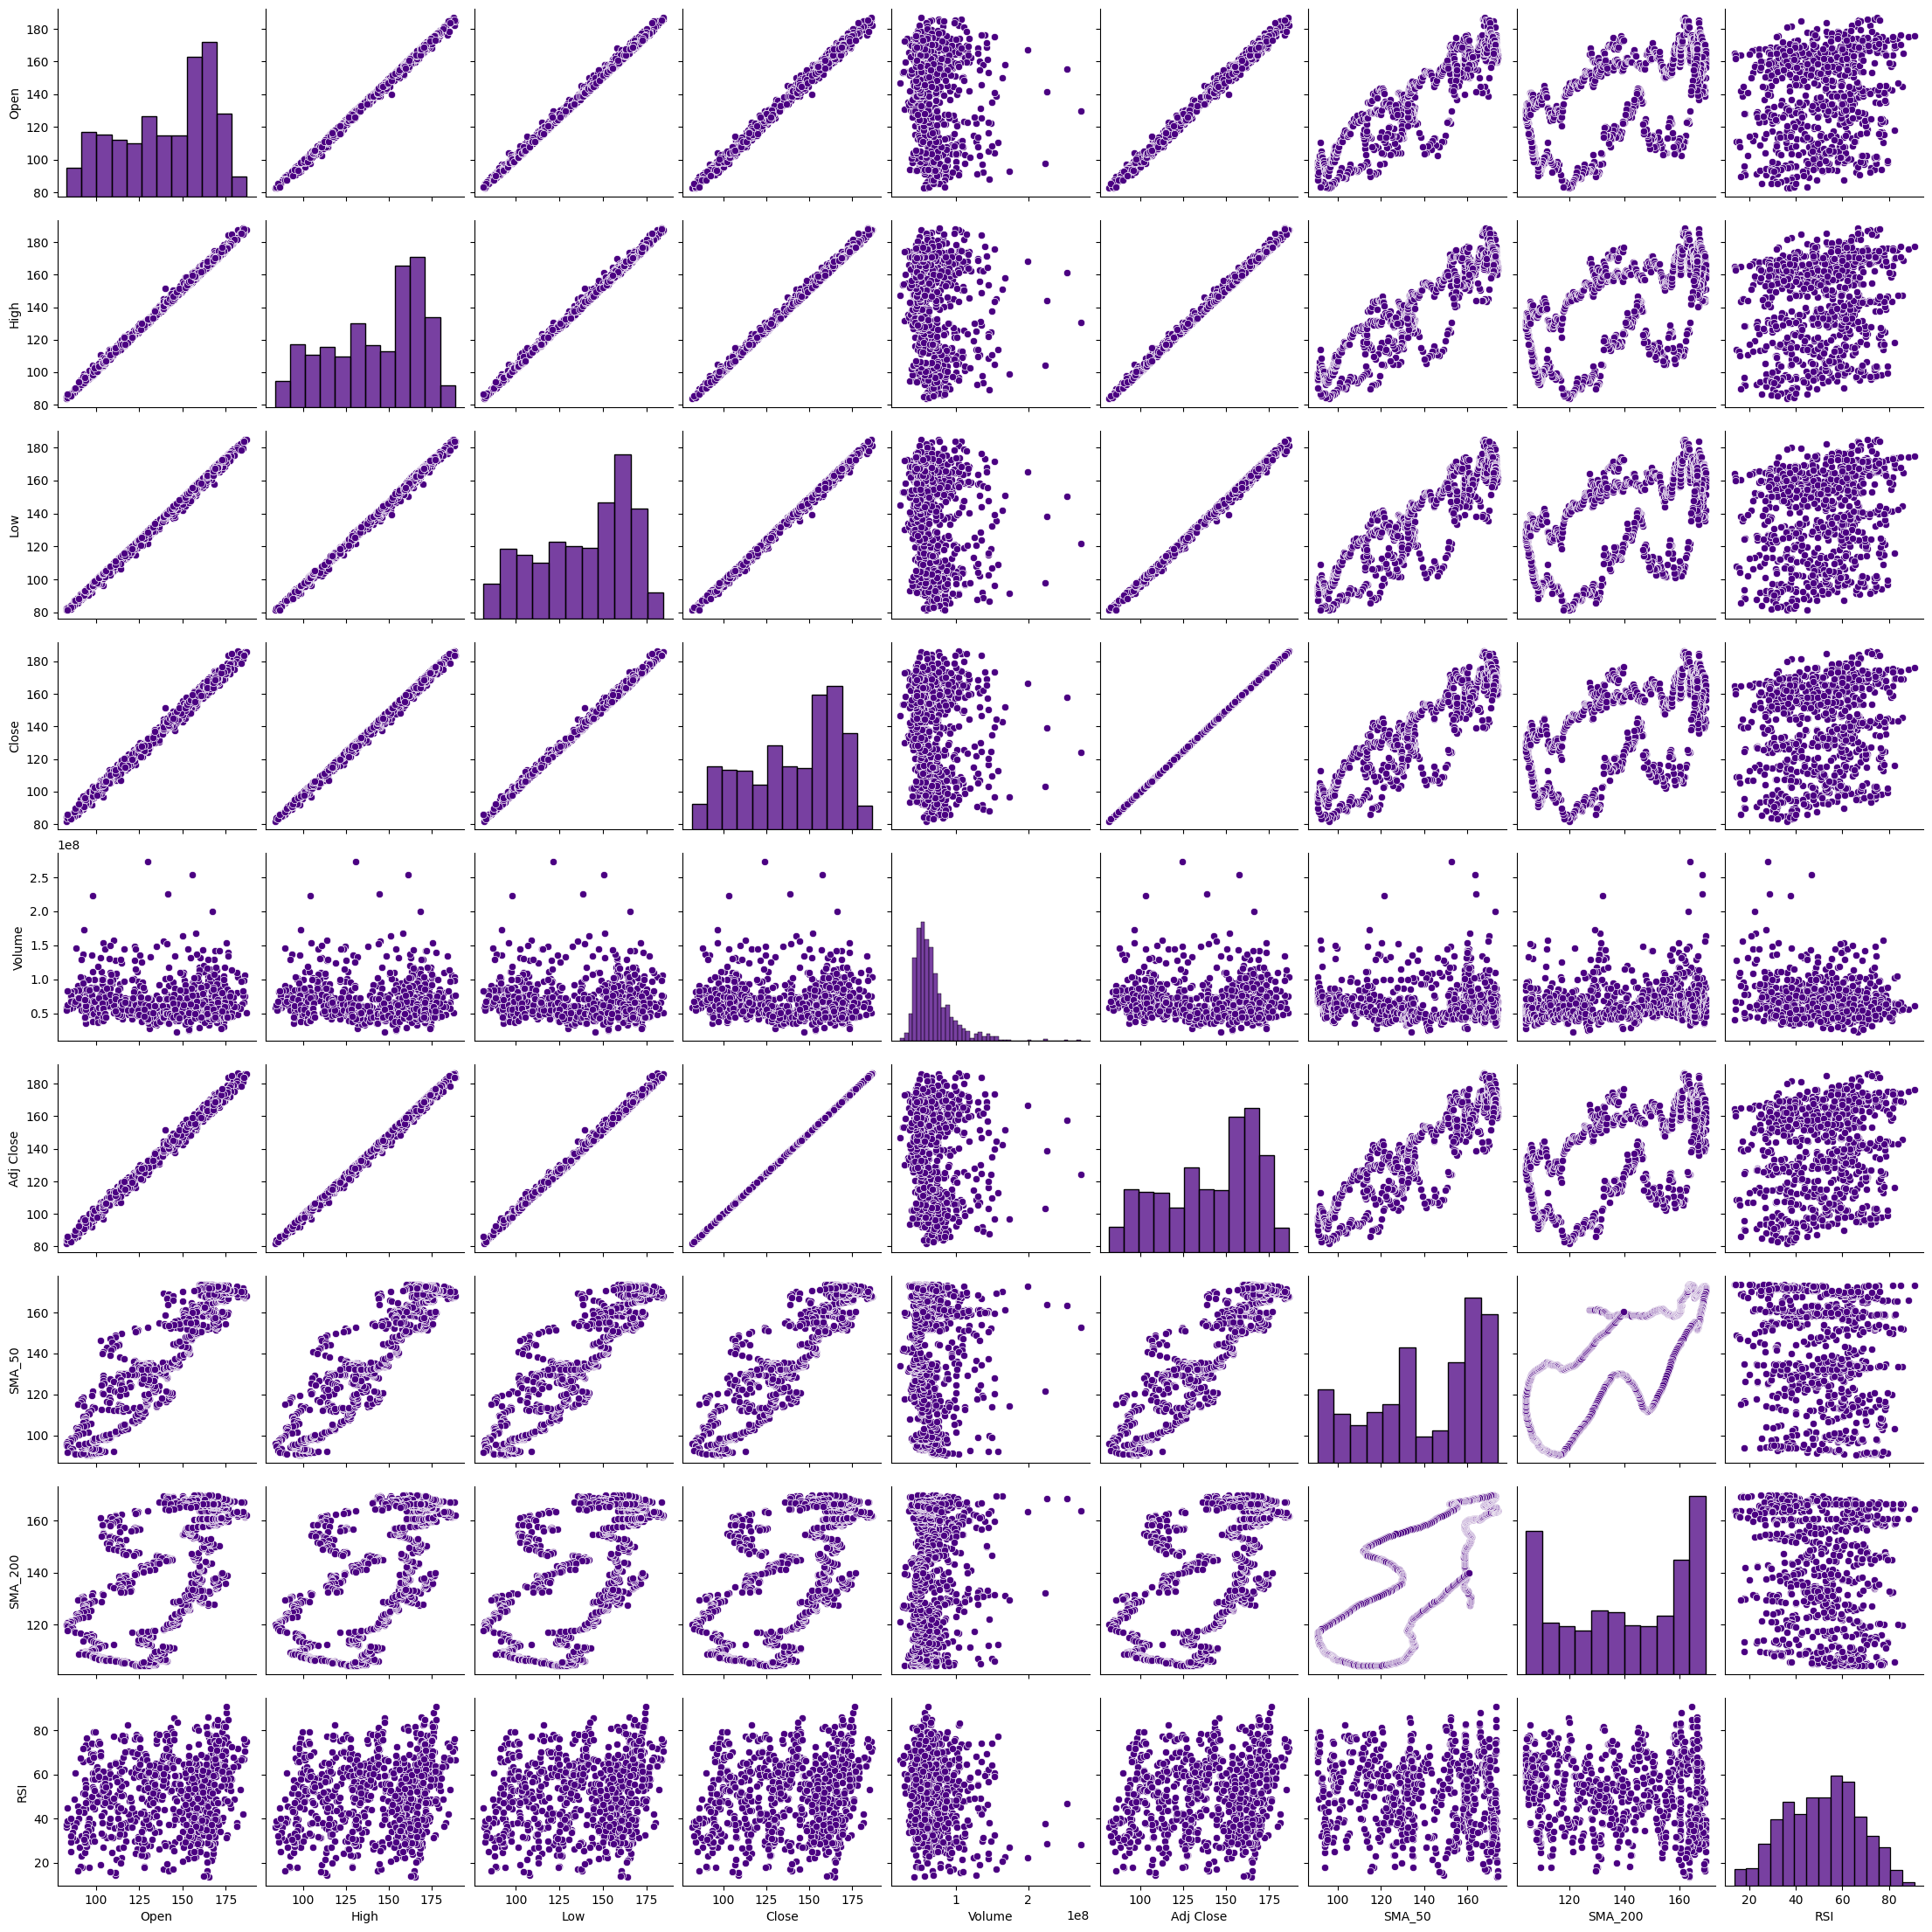

In [9]:
# Define the shades of purple for the color palette
purple_palette = ['#4B0082', '#6A5ACD', '#8A2BE2', '#9370DB', '#8B008B', '#800080']

# Define the columns to include in the pair plot
columns_to_include = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'SMA_50', 'SMA_200', 'RSI']

# Subset the dataframe with the selected columns
amazon_data_subset = df[columns_to_include]

# Set the color palette
sns.set_palette(sns.color_palette(purple_palette))

# Create the pair plot
pair_plot = sns.pairplot(amazon_data_subset)
plt.show()

# 3D Surface plots

In [10]:
#  3D surface plot
fig = go.Figure()

# Add surface plot
fig.add_trace(go.Surface(x=df['Date'], y=df['SMA_50'], z=df['SMA_200'], name='Surface'))

# Add scatter plot
fig.add_trace(go.Scatter3d(x=df['Date'], y=df['SMA_50'], z=df['SMA_200'], mode='markers', name='Data Points', 
                           marker=dict(size=5, color='purple')))

# Update layout
fig.update_layout(
    title='3D Surface Plot with Scatter Points of SMA_50 and SMA_200 Over Time',
    scene=dict(
        xaxis_title='Date',
        yaxis_title='SMA_50',
        zaxis_title='SMA_200',
        xaxis=dict(tickfont=dict(size=10, color='black')),
        yaxis=dict(tickfont=dict(size=10, color='black')),
        zaxis=dict(tickfont=dict(size=10, color='black')),
        bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust scene background color and opacity
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust plot background color and opacity
    paper_bgcolor='rgba(240, 248, 255, 0.7)',  # Adjust paper background color and opacity
    font=dict(color='black')
)

# Show plot
fig.show()


#  3D surface plot
fig = go.Figure()

# Add surface plot
fig.add_trace(go.Surface(x=df['Date'], y=df['SMA_50'], z=df['SMA_200'], name='Surface'))

# Add scatter points for Low, High, Close, and Open prices
fig.add_trace(go.Scatter3d(x=df['Date'], y=df['SMA_50'], z=df['Low'], mode='markers', name='Low', marker=dict(size=5, color='purple')))
fig.add_trace(go.Scatter3d(x=df['Date'], y=df['SMA_50'], z=df['High'], mode='markers', name='High', marker=dict(size=5, color='orange')))


# Update layout
fig.update_layout(
    title='3D Surface Plot with Scatter Points of SMA_50 and SMA_200 With LOW and HiGH ',
    scene=dict(
        xaxis_title='Date',
        yaxis_title='SMA_50',
        zaxis_title='Price',
        xaxis=dict(tickfont=dict(size=10, color='black')),
        yaxis=dict(tickfont=dict(size=10, color='black')),
        zaxis=dict(tickfont=dict(size=10, color='black')),
        bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust scene background color and opacity
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust plot background color and opacity
    paper_bgcolor='rgba(240, 248, 255, 0.7)',  # Adjust paper background color and opacity
    font=dict(color='black')
)

# Show plot
fig.show()

#  3D surface plot
fig = go.Figure()

# Add surface plot
fig.add_trace(go.Surface(x=df['Date'], y=df['SMA_50'], z=df['SMA_200'], name='Surface'))

# Add scatter points for Low, High, Close, and Open prices

fig.add_trace(go.Scatter3d(x=df['Date'], y=df['SMA_50'], z=df['Close'], mode='markers', name='Close', marker=dict(size=5, color='red')))
fig.add_trace(go.Scatter3d(x=df['Date'], y=df['SMA_50'], z=df['Open'], mode='markers', name='Open', marker=dict(size=5, color='purple')))

# Update layout
fig.update_layout(
    title='3D Surface Plot with Scatter Points of SMA_50 and SMA_200 With CLOSE and OPEN ',
    scene=dict(
        xaxis_title='Date',
        yaxis_title='SMA_50',
        zaxis_title='Price',
        xaxis=dict(tickfont=dict(size=10, color='black')),
        yaxis=dict(tickfont=dict(size=10, color='black')),
        zaxis=dict(tickfont=dict(size=10, color='black')),
        bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust scene background color and opacity
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Adjust plot background color and opacity
    paper_bgcolor='rgba(240, 248, 255, 0.7)',  # Adjust paper background color and opacity
    font=dict(color='black')
)

# Show plot
fig.show()

**Credit**:

https://www.kaggle.com/code/muhammadibrahimqasmi/let-s-cook-some-plots-bro-time-series